# Kelly Criterion for Bernoulli Betting

This notebook studies the Kelly criterion in a simple Bernoulli betting scenario where:
- A player bets a fraction $l \leq 1$ of their wealth
- With probability $p$, they lose their bet (wealth becomes $1-l$)
- With probability $(1-p)$, they win their bet (wealth becomes $1+l$)

## Mathematical Explanation

The Kelly criterion is a formula for determining the optimal size of a series of bets to maximize the long-term growth rate of wealth. In our Bernoulli betting scenario:

### Setup
- Initial wealth: $W_0 = 1$ (normalized)
- Betting fraction: $l$ (the fraction of wealth wagered)
- Probability of losing: $p$
- Probability of winning: $1-p$
- Final wealth: $X = \begin{cases} 1-l & \text{with probability } p \\ 1+l & \text{with probability } 1-p \end{cases}$

### Expected Log Wealth
The Kelly criterion maximizes the expected logarithmic growth rate:

$$E[\log(X)] = p \cdot \log(1-l) + (1-p) \cdot \log(1+l)$$

### Finding the Optimal Betting Fraction
To find the optimal $l^*$, we take the derivative and set it to zero:

$$\frac{d}{dl} E[\log(X)] = \frac{-p}{1-l} + \frac{1-p}{1+l} = 0$$

Solving for $l$:
$$\frac{1-p}{1+l} = \frac{p}{1-l}$$
$$(1-p)(1-l) = p(1+l)$$
$$1-p-l+pl = p+pl$$
$$1-p-l = p$$
$$l^* = 1-2p$$

### Key Insights from the Figure:

1. **When $p = 0$** (always win): The optimal fraction is $l^* = 1$ (bet everything)

2. **When $p < 0.5$** (favorable odds): The optimal fraction is $l^* = 1-2p > 0$

3. **When $p = 0.5$** (fair game): The optimal fraction is $l^* = 0$ (don't bet)

4. **When $p > 0.5$** (unfavorable odds): The optimal fraction is $l^* = 0$ (don't bet)

5. **Growth Rate**: The vertical axis shows $\exp(E[\log(X)]) - 1$, which represents the expected geometric growth rate minus 1. This is approximately the expected growth rate per period for small values.

6. **Concavity**: All curves are concave, showing that over-betting is worse than under-betting relative to the Kelly fraction.

7. **Risk of Ruin**: As $l \to 1$, the growth rate approaches $-1$ for any $p > 0$, representing the certainty of eventual ruin when betting everything.


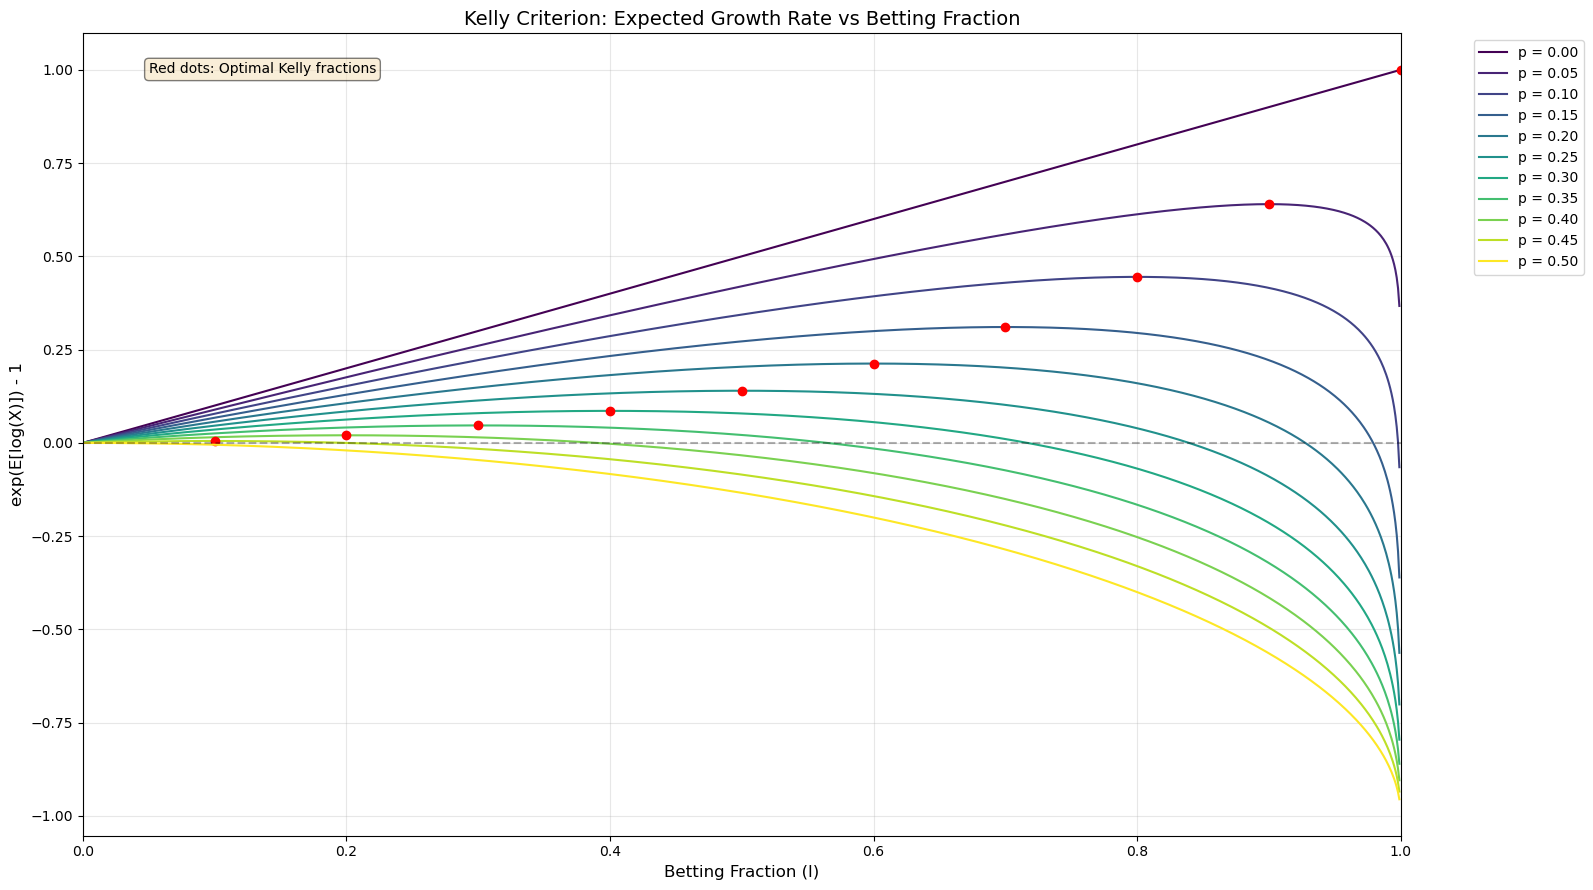

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the expected log wealth function
def expected_log_growth(l, p):
    """
    Calculate exp(E[log(X)]) - 1 where X is the final payoff
    
    Parameters:
    l: betting fraction (0 <= l <= 1)
    p: probability of losing
    
    Returns:
    exp(E[log(X)]) - 1
    """
    # Handle edge cases
    if l == 0:
        return 0  # No betting, no growth
    if l == 1:
        if p > 0:
            return -1  # Complete loss with positive probability
        else:
            return 1  # Always win if p=0
    
    # Expected log wealth: E[log(X)] = p * log(1-l) + (1-p) * log(1+l)
    expected_log_wealth = p * np.log(1 - l) + (1 - p) * np.log(1 + l)
    
    # Return exp(E[log(X)]) - 1
    return np.exp(expected_log_wealth) - 1

# Calculate optimal Kelly fraction
def kelly_fraction(p):
    """
    Calculate the optimal Kelly betting fraction
    
    Parameters:
    p: probability of losing
    
    Returns:
    Optimal betting fraction
    """
    if p >= 0.5:
        return 0  # Don't bet if losing probability is >= 0.5
    else:
        return 1 - 2 * p

# Create the plot
plt.figure(figsize=(16, 9))

# Generate p values from 0 to 0.5 in steps of 0.05
p_values = np.arange(0, 0.55, 0.05)

# Create a colormap for the lines
colors = plt.cm.viridis(np.linspace(0, 1, len(p_values)))

# Plot for each p value
for i, p in enumerate(p_values):
    # Generate l values (betting fractions)
    l_values = np.linspace(0, 0.999, 1000)  # Avoid exactly 1 to prevent log(0)
    
    # Calculate growth rates
    growth_rates = [expected_log_growth(l, p) for l in l_values]
    
    # Plot the curve
    plt.plot(l_values, growth_rates, color=colors[i], label=f'p = {p:.2f}')
    
    # Find and plot the optimal Kelly fraction
    l_optimal = kelly_fraction(p)
    if l_optimal > 0:
        growth_optimal = expected_log_growth(l_optimal, p)
        plt.plot(l_optimal, growth_optimal, 'ro', markersize=6)

# Customize the plot
plt.xlabel('Betting Fraction (l)', fontsize=12)
plt.ylabel('exp(E[log(X)]) - 1', fontsize=12)
plt.title('Kelly Criterion: Expected Growth Rate vs Betting Fraction', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.xlim(0, 1)

# Add annotation for optimal points
plt.text(0.05, 0.95, 'Red dots: Optimal Kelly fractions', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=10)

plt.tight_layout()
plt.show()


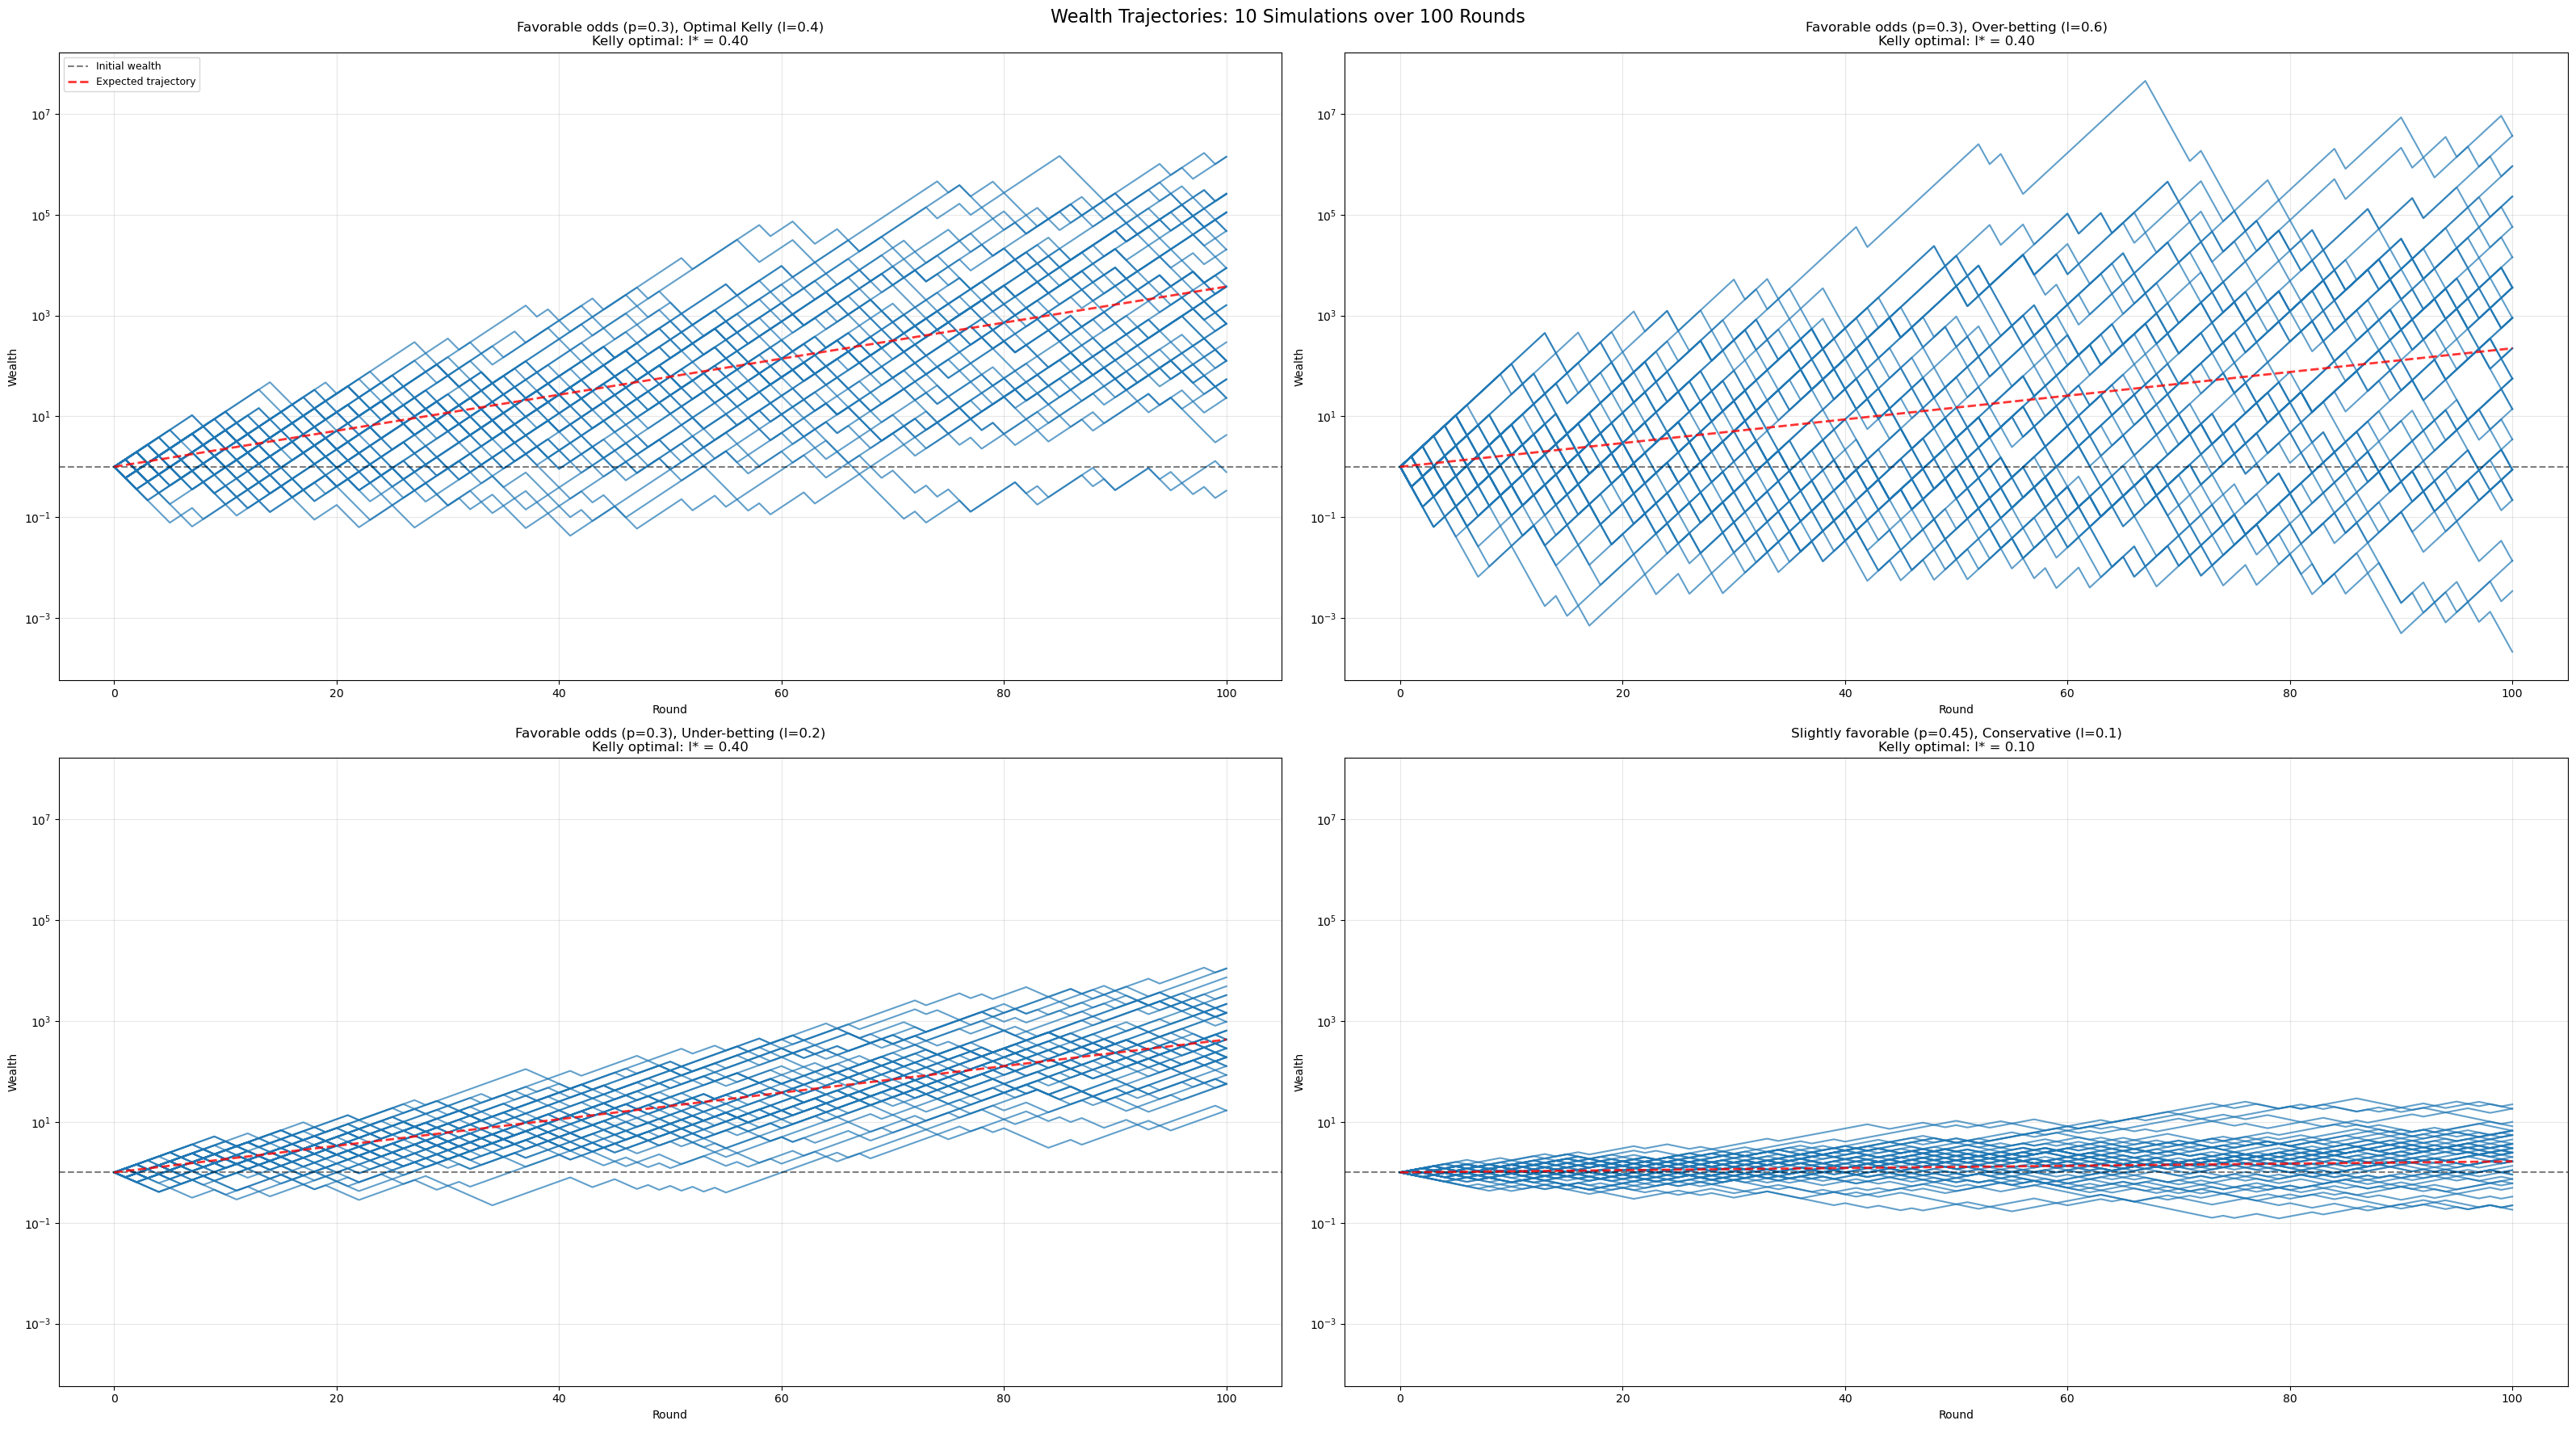


Summary Statistics for Each Scenario:

Favorable odds (p=0.3), Optimal Kelly (l=0.4)
  Kelly optimal: l* = 0.40
  Expected growth rate: 0.0858 (8.58% per round)
  Betting strategy: Optimal

Favorable odds (p=0.3), Over-betting (l=0.6)
  Kelly optimal: l* = 0.40
  Expected growth rate: 0.0556 (5.56% per round)
  Betting strategy: Over-betting

Favorable odds (p=0.3), Under-betting (l=0.2)
  Kelly optimal: l* = 0.40
  Expected growth rate: 0.0626 (6.26% per round)
  Betting strategy: Under-betting

Slightly favorable (p=0.45), Conservative (l=0.1)
  Kelly optimal: l* = 0.10
  Expected growth rate: 0.0050 (0.50% per round)
  Betting strategy: Optimal


In [2]:
# Simulate wealth trajectories for different betting strategies
def simulate_wealth_trajectory(l, p, n_rounds=100, initial_wealth=1.0):
    """
    Simulate a single wealth trajectory for given betting fraction and losing probability
    
    Parameters:
    l: betting fraction
    p: probability of losing
    n_rounds: number of betting rounds
    initial_wealth: starting wealth
    
    Returns:
    Array of wealth values over time
    """
    wealth = initial_wealth
    trajectory = [wealth]
    
    for _ in range(n_rounds):
        if np.random.random() < p:
            # Lost the bet
            wealth = wealth * (1 - l)
        else:
            # Won the bet
            wealth = wealth * (1 + l)
        trajectory.append(wealth)
    
    return np.array(trajectory)

# Create 2x2 subplots with different scenarios
fig, axes = plt.subplots(2, 2, figsize=(32, 18))
fig.suptitle('Wealth Trajectories: 10 Simulations over 100 Rounds', fontsize=16)

# Define scenarios (p, l, description)
scenarios = [
    (0.3, 0.4, "Favorable odds (p=0.3), Optimal Kelly (l=0.4)"),
    (0.3, 0.6, "Favorable odds (p=0.3), Over-betting (l=0.6)"),
    (0.3, 0.2, "Favorable odds (p=0.3), Under-betting (l=0.2)"),
    (0.45, 0.1, "Slightly favorable (p=0.45), Conservative (l=0.1)")
]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Set random seed for reproducibility
np.random.seed(42)

ylim = [1, 1]
for idx, (ax, (p, l, title)) in enumerate(zip(axes.flat, scenarios)):
    # Run 10 simulations
    for sim in range(50):
        trajectory = simulate_wealth_trajectory(l, p, n_rounds=100)
        ax.plot(trajectory, alpha=0.7, linewidth=1.5, color=colors[0])
    
    # Calculate and display the Kelly optimal for reference
    l_kelly = kelly_fraction(p)
    
    # Customize subplot
    ax.set_title(f"{title}\nKelly optimal: l* = {l_kelly:.2f}", fontsize=12)
    ax.set_xlabel('Round')
    ax.set_ylabel('Wealth')
    ax.set_yscale('log')  # Use log scale for better visualization
    ax.grid(True, alpha=0.3)
    ax.axhline(y=1, color='k', linestyle='--', alpha=0.5, label='Initial wealth')
    ylim[0] = min(ylim[0], ax.get_ylim()[0])
    ylim[1] = max(ylim[1], ax.get_ylim()[1])

    # Add expected growth line
    expected_growth_rate = expected_log_growth(l, p) + 1
    expected_trajectory = [expected_growth_rate**t for t in range(101)]
    ax.plot(expected_trajectory, 'r--', linewidth=2, alpha=0.8, label='Expected trajectory')
    
    # Add legend to first subplot only
    if idx == 0:
        ax.legend(loc='upper left', fontsize=9)

for ax in axes.flat:
    ax.set_ylim(ylim[0], ylim[1])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Each Scenario:")
print("="*60)
for p, l, desc in scenarios:
    l_kelly = kelly_fraction(p)
    growth_rate = expected_log_growth(l, p)
    print(f"\n{desc}")
    print(f"  Kelly optimal: l* = {l_kelly:.2f}")
    print(f"  Expected growth rate: {growth_rate:.4f} ({growth_rate*100:.2f}% per round)")
    print(f"  Betting strategy: {'Optimal' if abs(l - l_kelly) < 0.01 else 'Over-betting' if l > l_kelly else 'Under-betting'}")
